In [9]:
import altair as alt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from collections import defaultdict
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans

# Load Data

In [7]:
similar_clusters_file = 'data/sim_cluster.txt'

df_sim_clusters = pd.read_csv(similar_clusters_file, sep = '\t').fillna('')
df_sim_clusters

,group,locus_id,gene,product,notes,Unnamed: 5
0,nif,EQU24_RS17345,nifV,homocitrate synthase,,
1,nif,EQU24_RS17340,cysE(nifP?),serine O-acetyltransferase,,
2,nif,EQU24_RS17335,,hypothetical protein,,
3,nif,EQU24_RS17330,,(2Fe-2S) ferredoxin domain-containing protein,,
4,nif,EQU24_RS17325,,hypothetical protein,,
...,...,...,...,...,...,...
91,cu_repressible,EQU24_RS10665,,chemotaxis protein,Cu Expression analysis doc from Joseph,
92,cu_repressible,EQU24_RS19515,,hypothetical protein,Cu Expression analysis doc from Joseph,
93,cu_repressible,EQU24_RS19510,,DUF2939 domain-containing protein,Cu Expression analysis doc from Joseph,
94,cu_repressible,EQU24_RS05915,,BLUF domain-containing protein,Cu Expression analysis doc from Joseph,


Text(0.5, 1.0, 'Histogram of Potential Clusters with Similar Genes')

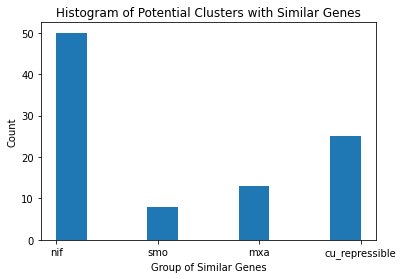

In [15]:
plt.hist(df_sim_clusters['group'])
plt.xlabel("Group of Similar Genes")
plt.ylabel("Count")
plt.title("Histogram of Potential Clusters with Similar Genes")

In [21]:
group_to_ids = {}

ids = list(zip(df_sim_clusters.group, df_sim_clusters.locus_id))

for id in ids: 
    group = id[0]
    locus = id[1]
    
    if group not in group_to_ids.keys(): 
        group_to_ids[group] = [locus]
    else: 
        group_to_ids[group].append(locus)

group_to_ids

{'nif': ['EQU24_RS17345',
  'EQU24_RS17340',
  'EQU24_RS17335',
  'EQU24_RS17330',
  'EQU24_RS17325',
  'EQU24_RS17315',
  'EQU24_RS17310',
  'EQU24_RS17305',
  'EQU24_RS17300',
  'EQU24_RS17295',
  'EQU24_RS17290',
  'EQU24_RS17285',
  'EQU24_RS17280',
  'EQU24_RS17275',
  'EQU24_RS17270',
  'EQU24_RS17265',
  'EQU24_RS17260',
  'EQU24_RS17255',
  'EQU24_RS17250',
  'EQU24_RS17245',
  'EQU24_RS17240',
  'EQU24_RS17235',
  'EQU24_RS17230',
  'EQU24_RS17225',
  'EQU24_RS17220',
  'EQU24_RS17215',
  'EQU24_RS17210',
  'EQU24_RS17205',
  'EQU24_RS17200',
  'EQU24_RS17170',
  'EQU24_RS17165',
  'EQU24_RS17160',
  'EQU24_RS17155',
  'EQU24_RS17150',
  'EQU24_RS17145',
  'EQU24_RS17140',
  'EQU24_RS17135',
  'EQU24_RS17130',
  'EQU24_RS17125',
  'EQU24_RS17120',
  'EQU24_RS17115',
  'EQU24_RS17105',
  'EQU24_RS17100',
  'EQU24_RS17095',
  'EQU24_RS17090',
  'EQU24_RS17085',
  'EQU24_RS17080',
  'EQU24_RS17075',
  'EQU24_RS17070',
  'EQU24_RS17065'],
 'smo': ['EQU24_RS05930',
  'EQU24_RS05925

# Cluster Exploration

### Investigate the optimal clustering method + hyperparameters found through clustering
- Check if pmoC and pmoA genes belong in a similar cluster (likely due to high expression)
    - EQU24_RS19315 --> pmoC
    - EQU24_RS12525 --> ssrA
- Check the groups of genes that Erin had sent along! (loaded in through text file above)